<a href="https://colab.research.google.com/github/lalit-kumr/credit_card_consumption/blob/main/Credit_card-03-Sep-21-12-48am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps
- Import libs
- Import data
- Clean both sets
- Merge the data sets
- Split data in numerical and categorical
- Outlier removal in both sets
- fill na
- splitting in train and predict
- Label encoding
- Join dataset
- Build model OLS
- Remove features having high p value
- Apply vif
- Drop vif unwanted variables one by one
- Log of y 
- OLS model again
- RFE
- Apply linear reg model





## 0. Importing libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing Data

In [173]:
# behaviour = pd.read_csv('CustomerBehaviorData.csv')
# consumption = pd.read_csv('CreditConsumptionData.csv')
# customer = pd.read_csv('CustomerDemographics.csv')


behaviour = pd.read_csv('https://github.com/lalit-kumr/credit_card_consumption/blob/main/CustomerBehaviorData.csv?raw=true')
consumption = pd.read_csv('https://github.com/lalit-kumr/credit_card_consumption/raw/main/CreditConsumptionData.csv')
customer = pd.read_csv('https://github.com/lalit-kumr/credit_card_consumption/raw/main/CustomerDemographics.csv')

## 2. Cleaning Data

In [174]:
#finding NaN values in customer df
# customer.isna().sum()
#Droppping observations having NaN values
customer.dropna(inplace=True)
customer.isna().sum()

customer_id                     0
account_type                    0
gender                          0
age                             0
income                          0
emp_tenure_years                0
tenure_with_bank                0
region_code                     0
net_banking_flag                0
avg_days_between_transaction    0
dtype: int64

In [175]:
#Droppping observations having NaN values
behaviour.dropna(inplace=True)
behaviour.isna().sum()

customer_id              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [176]:
# checking nan cells in coonsumption
consumption.isna().sum()

customer_id          0
cc_cons_target    5000
dtype: int64

## 3.Merging the data Frames

### 3.1 Merging the dataframes

In [179]:
# - now we will merge all three dataframes on the basis of customer_id.
# - first we will merge customer and behaviour dataframes as customer_be
# - next we will merge the cosumption dataframe with the custoemr_be df and store the resultant dataframe in **final**


customer_behaviour = pd.merge(left=customer, right=behaviour, on='customer_id')
final = pd.merge(left=customer_behaviour, right=consumption, on='customer_id')

#dropping customer id
final.drop(labels='customer_id',axis=1,inplace=True)

## 4\. Splitting data into numerical and categorical

In [180]:
#extracting numerical columns from the dataset
num_cols = final.columns.difference(['account_type', 'gender', 'income', 'loan_enq'])
num_cols = final[num_cols]
num_cols.columns

Index(['age', 'avg_days_between_transaction', 'card_lim', 'cc_cons_apr',
       'cc_cons_jun', 'cc_cons_may', 'cc_cons_target', 'cc_count_apr',
       'cc_count_jun', 'cc_count_may', 'credit_amount_apr',
       'credit_amount_jun', 'credit_amount_may', 'credit_count_apr',
       'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun',
       'dc_cons_may', 'dc_count_apr', 'dc_count_jun', 'dc_count_may',
       'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may',
       'debit_count_apr', 'debit_count_jun', 'debit_count_may', 'emi_active',
       'emp_tenure_years', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'net_banking_flag', 'personal_loan_active',
       'personal_loan_closed', 'region_code', 'tenure_with_bank',
       'vehicle_loan_active', 'vehicle_loan_closed'],
      dtype='object')

In [181]:
#extracting categorical columns from the data
cat_cols = final.select_dtypes(include=['O'])
cat_cols.columns

Index(['account_type', 'gender', 'income', 'loan_enq'], dtype='object')

## 6\. label encoding of cat cols

In [182]:
cat_cols = pd.get_dummies(cat_cols)
cat_cols.drop(labels=['account_type_saving','gender_F','income_HIGH'],axis=1,inplace=True)
#renaming columns
cat_cols.columns = ['account_type','gender','income_low','income_medium', 'loan_enq']
cat_cols.head(3)

,account_type,gender,income_low,income_medium,loan_enq
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1


###  Joining cat_cols and num_cols

In [183]:
# joining the num_cols and cat_cols df 
df = pd.concat([num_cols,cat_cols],axis=1)
df.head(3)

,age,avg_days_between_transaction,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_cons_target,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,emp_tenure_years,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,net_banking_flag,personal_loan_active,personal_loan_closed,region_code,tenure_with_bank,vehicle_loan_active,vehicle_loan_closed,account_type,gender,income_low,income_medium,loan_enq
0,63,5.0,519000,7998.48,6881.81,9553.00,NaN,8.0,13,23,44630.50,369000.75,61887.50,1,40,5,2289.0,3124.0,2879.58,47,30,3,79085.00,44884.90,107662.02,63.0,96,14,2646.72,30.1,13659.0,14000.0,80000.0,6885.0,48134.00,46088.0,20770.0,1,1,1.0,628.0,10,1,1,1,1,0,1,1
1,36,12.0,402000,16479.64,12032.60,7386.49,NaN,19.0,7,32,216770.95,243182.32,36644.25,1,7,4,415.0,6738.0,6763.00,1,16,37,85171.16,91073.84,34376.79,10.0,12,63,5469.79,14.4,942327.7,172131.0,28912.0,553.0,31820.00,17953.0,78627.0,0,1,1.0,656.0,10,1,1,1,1,0,1,1
2,28,13.0,114000,29272.03,531.43,4170.53,NaN,12.0,44,30,24878.00,35467.00,50121.00,33,16,6,40994.0,3778.0,26717.30,22,37,15,44916.42,96552.00,140182.87,55.0,42,82,7207.85,4.8,70310.6,208652.0,1036.0,1089.0,1035431.79,41121.0,1260.0,1,1,1.0,314.0,10,1,1,1,0,0,1,1


## Pandas profiling

In [55]:
# import pandas_profiling

# profile_report=pandas_profiling.ProfileReport(df)
# profile_report.to_file("profile_report.html")

## Splitting the data in df_train and df_predict

In [194]:
#now we will split the df in two parts. df_predict and df_train.
#df_train will contain entries having numerial values in cc_cons_target
#df_predict will have the rows/customers that we have to predict the output for

#filtering all the rows from final that contain NaN values in cc_cons_target and storing those rows in df_predict.
df_predict = df[df.cc_cons_target.isna()]
#dropping the NaN values of cc_cons_target 
df_predict.drop(labels='cc_cons_target',axis=1,inplace=True)

# droppping  all the rows that are in the df_predict dataframe and storing the result in df_train
df_train = df.drop(df_predict.index)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [195]:
df_train.shape

(14995, 49)

In [196]:
df_predict.shape

(4993, 48)

## 5\. Outlier removal from df_train and df_predict

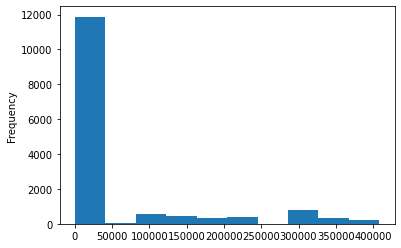

In [197]:
df_train.cc_cons_target.plot(kind='hist')

In [198]:
#As our target variable(cc_cons_target) is non_normalized, we will first drop the observations that do not have 
#values of target variable within 90%ile and 10%ile.
q_low = df_train['cc_cons_target'].quantile(0.10)
q_hi  = df_train['cc_cons_target'].quantile(0.90)

df_train = df_train[(df_train['cc_cons_target'] < q_hi) & (df_train['cc_cons_target'] > q_low)]


#Now we will treat outliers in all other columns
from scipy.stats import mstats

for x in df_train:
  df_train.loc[:,x] = mstats.winsorize(df_train[x], limits=[0.10, 0.10])
df_train.describe()


,age,avg_days_between_transaction,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_cons_target,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,emp_tenure_years,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,net_banking_flag,personal_loan_active,personal_loan_closed,region_code,tenure_with_bank,vehicle_loan_active,vehicle_loan_closed,account_type,gender,income_low,income_medium,loan_enq
count,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.0,11995.0,11995.000000,11995.000000,11995.0,11995.0,11995.000000,11995.000000,11995.000000,11995.000000,11995.0
mean,43.430179,11.043852,271229.359483,14680.670917,9666.562517,12855.160407,23943.163068,22.656357,38.233431,29.677449,61332.566889,61606.382900,66076.697998,11.175990,16.843518,11.004752,6241.505391,5187.074512,5645.444514,16.589912,29.504377,12.804919,54824.186599,60100.559157,52207.424835,34.499041,44.553897,36.607837,6419.291932,12.649971,154159.767291,168509.344239,31463.448547,2898.046830,40670.082687,40086.456698,41480.461882,0.719133,1.0,1.0,598.214840,5.491622,1.0,1.0,0.847520,0.861692,0.279783,0.639850,1.0
std,12.183941,5.336914,161461.792688,12608.717691,8283.947977,11284.008606,29733.943071,23.243571,28.467137,26.775827,43925.749986,46920.330554,51447.352246,12.097064,18.721018,14.345195,5770.187496,4846.296392,4980.057601,17.880576,27.586900,14.284081,40690.090273,43642.834355,39775.319992,26.179905,33.157609,29.470336,6331.864281,9.092013,238290.771922,157494.691618,39870.800866,5608.183095,25917.483681,27670.237442,28396.709869,0.449441,0.0,0.0,208.171213,2.569363,0.0,0.0,0.359501,0.345237,0.448911,0.480064,0.0
min,29.000000,3.000000,47000.000000,1921.530000,1377.200000,1689.500000,4885.000000,2.000000,4.000000,3.000000,14078.030000,11574.000000,12513.000000,1.000000,2.000000,1.000000,650.240000,607.000000,748.000000,1.000000,1.000000,1.000000,10449.170000,12484.780000,10781.570000,4.000000,7.000000,6.000000,450.630000,2.700000,690.000000,11897.000000,768.000000,-5942.000000,14150.000000,11440.000000,11775.000000,0.000000,1.0,1.0,269.000000,2.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,33.000000,6.000000,120500.000000,4403.160000,3004.500000,3673.270000,8087.000000,5.000000,10.000000,8.000000,26882.000000,24705.000000,25217.250000,2.000000,4.000000,2.000000,1633.140000,1359.420000,1653.000000,2.000000,4.000000,2.000000,23085.000000,25740.130000,20853.260000,11.000000,12.000000,11.000000,1537.420000,5.200000,6100.000000,38928.000000,2214.000000,0.000000,20667.000000,19017.000000,20001.000000,0.000000,1.0,1.0,428.000000,3.000000,1.0,1.0,1.000000,1.000000,0.000000,0.000000,1.0
50%,40.000000,11.000000,272000.000000,10300.000000,6632.500000,8732.990000,13363.000000,10.000000,35.000000,23.000000,46970.130000,45680.000000,47770.000000,5.000000,7.000000,4.000000,4008.510000,3326.000000,3823.000000,7.000000,17.000000,5.000000,41982.090000,45733.940000,38019.150000,32.000000,38.000000,23.000000,3944.710000,9.900000,45036.000000,111000.000000,13873.000000,2351.000000,31908.000000,30400.000000,31205.000000,1.000000,1.0,1.0,623.000000,6.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0
75%,53.000000,16.000000,400000.000000,21509.385000,14182.800000,18900.190000,18698.00000

In [199]:
#taking the same steps for df_predict
for x in df_predict:
  df_predict.loc[:,x] = mstats.winsorize(df_predict[x], limits=[0.10, 0.10])
df_predict.describe()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,age,avg_days_between_transaction,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,emp_tenure_years,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,net_banking_flag,personal_loan_active,personal_loan_closed,region_code,tenure_with_bank,vehicle_loan_active,vehicle_loan_closed,account_type,gender,income_low,income_medium,loan_enq
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.0,4993.0,4993.000000,4993.000000,4993.0,4993.0,4993.000000,4993.000000,4993.000000,4993.000000,4993.0
mean,43.266773,10.929501,275425.858402,14241.275637,9458.192182,12414.279435,22.705588,38.203485,29.694973,60724.977567,62346.329243,65653.230719,10.966753,16.072301,10.972161,6164.686481,5094.125358,5647.964616,16.144602,30.226918,13.152814,55451.020767,61302.034482,51442.084624,33.885840,43.937913,36.416183,6290.255514,12.828540,146538.413854,166787.490961,31786.521762,2869.513323,40075.977032,39982.723649,43381.783851,0.712998,1.0,1.0,597.823954,5.452634,1.0,1.0,0.839575,0.868416,0.284799,0.632686,1.0
std,12.265384,5.140595,163953.256598,12275.330259,7995.949754,10963.126200,23.314681,28.024955,26.912721,43108.102337,47352.263121,51111.505017,12.020253,16.943504,14.132466,5811.795900,4776.423856,5071.489847,17.596663,27.918939,14.561956,41569.339952,45592.163718,39391.773624,25.581604,33.098758,29.438479,6110.618615,9.520577,226956.186848,154383.980311,39896.877594,5671.900797,25542.689655,27906.013575,30567.552902,0.452408,0.0,0.0,207.971724,2.884358,0.0,0.0,0.367036,0.338072,0.451364,0.482121,0.0
min,29.000000,3.000000,47000.000000,1866.320000,1344.000000,1636.400000,2.000000,4.000000,3.000000,14201.000000,11305.000000,12664.000000,1.000000,2.000000,1.000000,614.000000,612.400000,690.480000,1.000000,1.000000,1.000000,10124.000000,12190.700000,10569.750000,4.000000,7.000000,6.000000,470.880000,2.600000,690.000000,11897.000000,768.000000,-5942.000000,13906.000000,10998.000000,12313.000000,0.000000,1.0,1.0,269.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,33.000000,6.000000,124000.000000,4286.860000,2996.310000,3619.000000,5.000000,10.000000,8.000000,26380.000000,24973.000000,24593.000000,2.000000,4.000000,2.000000,1559.000000,1390.000000,1582.000000,2.000000,4.000000,2.000000,23097.500000,25876.800000,20526.000000,11.000000,12.000000,11.000000,1529.960000,5.100000,5468.000000,39833.190000,2214.000000,0.000000,20213.000000,18585.000000,20444.000000,0.000000,1.0,1.0,428.000000,3.000000,1.0,1.0,1.000000,1.000000,0.000000,0.000000,1.0
50%,39.000000,11.000000,282000.000000,10028.000000,6667.000000,8416.000000,10.000000,35.000000,23.000000,46505.000000,46782.000000,48058.000000,4.000000,7.000000,4.000000,3879.000000,3302.000000,3740.000000,7.000000,18.000000,6.000000,41320.720000,45471.430000,37761.470000,29.000000,36.000000,23.000000,3852.740000,9.900000,42460.609100,109000.000000,14754.000000,2351.000000,31698.000000,29867.000000,31898.000000,1.000000,1.0,1.0,623.000000,5.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0
75%,53.000000,16.000000,402000.000000,20660.260000,14078.975000,17844.860000,44.000000,61.000000,43.000000,85224.000000,87789.120000,94042.000000,19.000000,21.000000,10.000000,9354.650000,7153.000000,8398.000000,25.000000,54.00

## 8. Splitting df_train in df_train_x and df_train_y

In [200]:
df_train_x = df_train[df_train.columns.difference(['cc_cons_target'])]


df_train_y = df_train[['cc_cons_target']]
df_train_y.columns=['target']

### Normalizing target variable
our target variable should be normalized. Thus we will log transform  our train_y

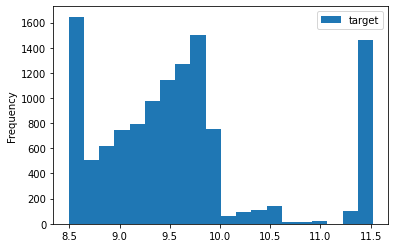

In [220]:
df_train_y_log = np.log(df_train_y)
df_train_y_log.plot(kind='hist',bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


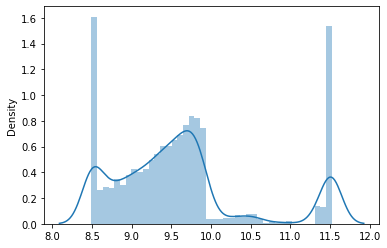

In [221]:
sns.distplot(df_train_y_log)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


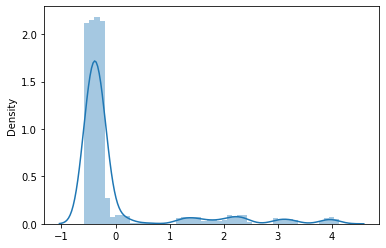

In [127]:
# from sklearn.preprocessing import StandardScaler

# std_scaler = StandardScaler()
# aa = std_scaler.fit_transform(df_train_y)

# # sns.distplot(aa)
# sns.distplot(aa)

## 9\. Running OLS model on our dataset

In [222]:
### OLS regression
import statsmodels.api as sm

model = sm.OLS(df_train_y,df_train_x)

model_fit = model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7166
Date:                Fri, 03 Sep 2021   Prob (F-statistic):              0.909
Time:                        19:16:20   Log-Likelihood:            -1.4055e+05
No. Observations:               11995   AIC:                         2.812e+05
Df Residuals:                   11954   BIC:                         2.815e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
account_type    

#### Result of OLS regression model
We can see from the above summary that many of the features have a p-value greter than that of 0.05. 

Thus we will remove those features from our model and rerun the OLS model

In [223]:
#removing the top 5 features on the basis of p_value
remove_cols = ['dc_count','Total_debit_amount','net_banking_flag','age','gender']
new_cols = df_train_x.columns.difference(remove_cols)
df_train_x = df_train_x[new_cols]


## VIF
- VIF is used to remove multicollinearity from the dataset. 
- VIF = 1/(1-R^2)

- It computes the R-sq value for every feature against all other features. The more a feature is collinear with other features , more the VIF score is.
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [224]:
#R^2 value is determined to find out how well an independent variable is described by the other independent variables. 
#A high value of R^2 means that the variable is highly correlated with the other variables.
#So, the closer the R^2 value to 1, the higher the value of VIF and
# the higher the multicollinearity with the particular independent variable.


# vif = 1/(1-r^2)


# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others




# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


X = df_train_x
calc_vif(X)



#Fixing Multicollinearity

# #Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:
# X = df.drop(['Age','Salary'],axis=1)
# calc_vif(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,account_type,1.002300
1,avg_days_between_transaction,1.003494
2,card_lim,1.002805
3,cc_cons_apr,1.004466
4,cc_cons_jun,1.004309
5,cc_cons_may,1.004446
6,cc_count_apr,1.002893
7,cc_count_jun,1.003859
8,cc_count_may,1.003221
9,credit_amount_apr,1.002050


### RFE

In [225]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE


dt_reg = DecisionTreeRegressor(random_state=0)

# lr = LinearRegression()
rfe = RFE(estimator=dt_reg, n_features_to_select=10)
rfe.fit(df_train_x, df_train_y.target)

rfe.ranking_


# selecting features given by RFE
f = rfe.get_support(1) #the most important features
selected_x = df_train_x[df_train_x.columns[f]] # final features`
selected_x.columns

Index(['card_lim', 'cc_cons_apr', 'credit_amount_apr', 'credit_amount_jun',
       'dc_cons_apr', 'dc_cons_may', 'debit_amount_apr', 'debit_amount_jun',
       'max_credit_amount_apr', 'max_credit_amount_jun'],
      dtype='object')

### Fitting the selected_x in OLS

In [226]:
model = sm.OLS(df_train_y_log,selected_x)

model_fit = model.fit()

print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          1.916e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:17:05   Log-Likelihood:                         -27217.
No. Observations:               11995   AIC:                                  5.445e+04
Df Residuals:                   11985   BIC:                                  5.453e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Predicting OLS regression values

In [227]:
train_y_log_hat = model_fit.predict(selected_x)
train_y_log_hat.columns = ['target']


train_y_hat = np.exp(train_y_log_hat)
train_y_hat = pd.DataFrame(train_y_hat)
# train_y_hat = train_y_hat.apply(lambda x: '%.5f' % x, axis=1)
# train_y_hat = pd.DataFrame(train_y_hat)
train_y_hat.columns = ['target']

### calculating errors

In [228]:
#UDF for calcualting MAPE,RMSE and RMSPE for the test values and forecasted values
def calculate_error(y_true,y_pred):
  map_error = np.mean((np.abs(y_true - y_pred))/y_true*100)
  rms_error = np.sqrt(np.mean(np.square(y_true - y_pred)))
  rmps_error = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
  result =  {'mape':map_error ,'rmse': rms_error ,'rmspe': rmps_error}
  return result

In [229]:
# calling the udf to calculate error between actual test values and arima forecasts
error_coff = calculate_error(df_train_y.target,train_y_hat.target)
print('------------OLS model error----------------------')
# print('MAPE  :',error_coff['mape'][0])
# print('RMSE  :',error_coff['rmse'][0])
# print('RMSPE :',error_coff['rmspe'][0])
print(error_coff)
print('-------------------------------------------------')



------------OLS model error----------------------
{'mape': 1030.992110333207, 'rmse': 1055031.4749308452, 'rmspe': 9576.289184190819}
-------------------------------------------------


In [230]:
train_y_hat.target

104      15741.794430
105       2893.801345
106       2010.737598
107      39943.562959
108        484.506051
             ...     
15092    10119.985564
15094    37604.761692
15095    34504.076076
15097    49316.016221
15098    57081.273585
Name: target, Length: 11995, dtype: float64

In [231]:
df_train_y.target

104       20014.0
105       10173.0
106       16095.0
107        7707.0
108      101078.0
           ...   
15092      6768.0
15094      4885.0
15095     11019.0
15097     28813.0
15098     16252.0
Name: target, Length: 11995, dtype: float64

In [232]:
np.mean(np.abs(df_train_y.target - train_y_hat.target))

119918.17199106814

## Train test split

In [233]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(selected_x, df_train_y, test_size=0.25, random_state=72)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

## Linear Regression

In [234]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# training the linear regression model on x_train and y_train_log
lr.fit(x_train ,y_train_log)

# predicting the values of selected_x and storing them in y_train_predicted
y_train_predicted = np.exp(lr.predict(x_train))


## Error calculation of train values

In [235]:
# calling the udf to calculate error between train_y_ln and predicted values
error_coff = calculate_error(y_train_predicted,y_train)
print('------------OLS model error----------------------')
print('MAPE  :',error_coff['mape'][0])
print('RMSE  :',error_coff['rmse'][0])
print('RMSPE :',error_coff['rmspe'][0])
# print(error_coff)
print('-------------------------------------------------')

------------OLS model error----------------------
MAPE  : 106.98614357908204
RMSE  : 31259.08937202817
RMSPE : 210.57933644106163
-------------------------------------------------


## Prediction test values

In [236]:
y_test_predicted = np.exp(lr.predict(x_test))

## Error Calculation of test values

In [237]:
# calling the udf to calculate error between train_y_ln and predicted values
error_coff = calculate_error(y_test_predicted,y_test)
print('------------OLS model error----------------------')
print('MAPE  :',error_coff['mape'][0])
print('RMSE  :',error_coff['rmse'][0])
print('RMSPE :',error_coff['rmspe'][0])
# print(error_coff)
print('-------------------------------------------------')

------------OLS model error----------------------
MAPE  : 103.64417593283396
RMSE  : 30571.457264718458
RMSPE : 206.40398420094522
-------------------------------------------------


## Predicting the values for the df_predict cstomers

In [238]:
#selecting the best features
df_predict_selected_x = df_predict[df_predict.columns[f]] # final features`
df_predict_selected_x.columns


#prediciting the consumption values
customer_predict = np.exp(lr.predict(df_predict_selected_x))
customer_predict

array([[14629.15544522],
       [14492.2036901 ],
       [14096.70246603],
       ...,
       [14699.64020244],
       [14979.24327258],
       [15317.0341707 ]])